In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 33.2 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and direc

In [ ]:
import numpy as np
import pandas as pd

import nltk
from konlpy.tag import Okt

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

In [ ]:
file_path = "/content/drive/MyDrive/acorn_final_project/data/wordcloud(2).csv"
df = pd.read_csv(file_path, encoding='UTF-8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      32 non-null     object
 1   age      32 non-null     object
 2   work     32 non-null     object
 3   career   32 non-null     object
 4   q1       32 non-null     object
 5   q2       32 non-null     object
 6   q3       31 non-null     object
 7   q4       31 non-null     object
 8   q5       30 non-null     object
 9   q6       30 non-null     object
 10  q7       30 non-null     object
 11  q8       32 non-null     object
 12  q9       32 non-null     object
 13  q10      30 non-null     object
 14  q11      32 non-null     object
 15  q12      31 non-null     object
 16  opinion  19 non-null     object
 17  a1       20 non-null     object
 18  a2       17 non-null     object
 19  a3       20 non-null     object
 20  a4       20 non-null     object
 21  a5       17 non-null     object
 22  a6  

In [ ]:
columns = [f'a{i}' for i in range(1, 10)]

# 각 컬럼의 결측치를 제거하고 리스트로 변환
data_lists = {col: df[col].dropna().tolist() for col in columns}
data_lists

{'a1': ['동일',
  '장비설치공간 외 운용유지 시설 필요(인력 등)',
  '잘모르겠다 ',
  '설치후 주변에 대한 경계 공간 필요',
  '정비 등 인력운용시 공간',
  '기타 장비 보관',
  '정비 등 활동공간 확보 필요',
  '장비 점검과 안전을 위한 보유공지',
  '(약15평)이상의 면적필요로 판단됨. 활동ㆍ기타 여유시간 확보로 탄력적 환경변화에 대응',
  '안전거리 확보차원',
  '지원장비 설치 필요',
  '일반적으로 옥상 구조물의 면적은 건설 면적의 1/8이어야 합니다. 그러나 해당 장비을 설치하는 옥상에 있는 수조, 전기실, 공조기등의 위치가 해당 구조물의 설치에 방해가 되는지를 보아야합니다. ',
  '운용 및 정비가능 구역 포함',
  '8평의 설치면적과 2평가량의 활동 구역이 필요함',
  '건물하중 고려',
  '유지관리 여건보장',
  '안전확보',
  '운용요원들의 원활한 활동공간 확보',
  '유지보수,관리차원',
  '천광 주변 부대시설 설치 및 경계시설설치'],
 'a2': ['하중 및 기타제반 고려',
  '오래된 건물은 하중고려 설계가 되지 않을것으로 판단',
  '잘모르겠다 ',
  '장기간 운용 가능한 건물에 설치',
  '일반 주택 재건축 판단기준도 30년이상',
  '관리질하면 오래감',
  '무기체계 채택 후 활용기간 고려',
  '건축물의 골조에 따라 다를 듯합니다. 벽돌조보다는 철근콘크리트가 내구성이 좋으니',
  '천공 활용 환경변화에 대응하기위한 10년 전후의 건물 생애주기 판단',
  '콘크리트 구조물',
  '질문이 이상합니다. 비주거용 건물의 수명은 어떤 구조물을 올리느냐에 따라 증가하고 감소하는 개념이 아니라, 설계단계에서 결정합니다.',
  '건물에 직접적인 피해효과가 없음',
  '드론의 목표가 될 수 잇는 건물(공공기관, 의료시설, 공장, 기반시설 등)은 수명이 매우 길게 설계되어 있기 때문',
  '건물 노후도',
  '안전',
  '장기적인 활용',
  '건축물 옥상 무게하

In [ ]:
replace_dict = {
    '.': '',
    '(': ' ',
    ')': '',
    ' \n': '',
    '\n': '',
    '\'': '',
    ',': '',
    '없음' : ''
}

for value in data_lists.values():
    print(type(value))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
for key in [f'a{i}' for i in range(1, 10)]:  # 'a1' ~ 'a9' 자동 생성
    # 리스트의 요소를 모두 문자열로 변환 후 합치기
    combined_str = ''.join(map(str, data_lists[key]))

    # replace_dict의 문자들을 치환하여 정리
    for old, new in replace_dict.items():
        combined_str = combined_str.replace(old, new)

    # 변환된 문자열을 다시 저장
    data_lists[key] = combined_str

In [ ]:
data_lists

{'a1': '동일장비설치공간 외 운용유지 시설 필요 인력 등잘모르겠다 설치후 주변에 대한 경계 공간 필요정비 등 인력운용시 공간기타 장비 보관정비 등 활동공간 확보 필요장비 점검과 안전을 위한 보유공지 약15평이상의 면적필요로 판단됨 활동ㆍ기타 여유시간 확보로 탄력적 환경변화에 대응안전거리 확보차원지원장비 설치 필요일반적으로 옥상 구조물의 면적은 건설 면적의 1/8이어야 합니다 그러나 해당 장비을 설치하는 옥상에 있는 수조 전기실 공조기등의 위치가 해당 구조물의 설치에 방해가 되는지를 보아야합니다 운용 및 정비가능 구역 포함8평의 설치면적과 2평가량의 활동 구역이 필요함건물하중 고려유지관리 여건보장안전확보운용요원들의 원활한 활동공간 확보유지보수관리차원천광 주변 부대시설 설치 및 경계시설설치',
 'a2': '하중 및 기타제반 고려오래된 건물은 하중고려 설계가 되지 않을것으로 판단잘모르겠다 장기간 운용 가능한 건물에 설치일반 주택 재건축 판단기준도 30년이상관리질하면 오래감무기체계 채택 후 활용기간 고려건축물의 골조에 따라 다를 듯합니다 벽돌조보다는 철근콘크리트가 내구성이 좋으니천공 활용 환경변화에 대응하기위한 10년 전후의 건물 생애주기 판단콘크리트 구조물질문이 이상합니다 비주거용 건물의 수명은 어떤 구조물을 올리느냐에 따라 증가하고 감소하는 개념이 아니라 설계단계에서 결정합니다건물에 직접적인 피해효과가 드론의 목표가 될 수 잇는 건물 공공기관 의료시설 공장 기반시설 등은 수명이 매우 길게 설계되어 있기 때문건물 노후도안전장기적인 활용건축물 옥상 무게하중 고려 최근 내진설계기준 적용 건물 부터 가능할것으로 판단됨',
 'a3': '주변 엄폐물 등 고려 설치제품자체가 무거워서 붕괴시 인명피해 고려 중저층 설치 필요레이저 위험성과 적 피격 거리 고려 지대에서 가장 높은곳 선정고공에서부터 파괴무인기 드론 등 고려가시거리 확보대공무기로서의 입지조건차폐와 가시거리 확보설문상 적 무인기 식별ㆍ타격에 용이하고 주변 장애물 요소 최소화사각으로 인한 사용제한 최소화레이저 특

In [ ]:
word_value = list(data_lists.values())
word_value = str(word_value)
type(word_value)

str

In [ ]:
twitter = Okt()
raw_pos_tagged = twitter.pos(word_value, stem = True, norm = True)
raw_pos_tagged[100:130]

[('전기', 'Noun'),
 ('실', 'Noun'),
 ('공', 'Modifier'),
 ('조', 'Modifier'),
 ('기', 'Modifier'),
 ('등', 'Noun'),
 ('의', 'Josa'),
 ('위치', 'Noun'),
 ('가', 'Josa'),
 ('해당', 'Noun'),
 ('구조', 'Noun'),
 ('물의', 'Noun'),
 ('설치', 'Noun'),
 ('에', 'Josa'),
 ('방해', 'Noun'),
 ('가', 'Josa'),
 ('되다', 'Verb'),
 ('보아', 'Noun'),
 ('야하다', 'Adjective'),
 ('운용', 'Noun'),
 ('및', 'Noun'),
 ('정비', 'Noun'),
 ('가능', 'Noun'),
 ('구역', 'Noun'),
 ('포함', 'Noun'),
 ('8', 'Number'),
 ('평의', 'Noun'),
 ('설치', 'Noun'),
 ('면적', 'Noun'),
 ('과', 'Josa')]

In [ ]:
type(raw_pos_tagged)

list

In [ ]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다',
            '그렇다', '아니다', '이렇다', '그렇다', '어떻다',
            '외', '등', '잘', '에', '시','때문', '습니다',
            '모르다','하중','되어다','외','대한','자다',
            '하지만','가능물의','부터','따르다'
            ]

word_cleaned = []

for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign", "Number", 'Adjective']:
        if (len(word[0]) != 1) & (word[0] not in del_list):
            word_cleaned.append(word[0])

raw_pos_tagged[0:10]

[("['", 'Punctuation'),
 ('동일', 'Noun'),
 ('장비', 'Noun'),
 ('설치', 'Noun'),
 ('공간', 'Noun'),
 ('외', 'Noun'),
 ('운용', 'Noun'),
 ('유지', 'Noun'),
 ('시설', 'Noun'),
 ('필요', 'Noun')]

In [ ]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic: # 처음 등장할 시
        word_dic[word] = 1
    else: # 추가 등장시 count ++
        word_dic[word] += 1

In [ ]:
from collections import Counter

result = Counter(word_cleaned)
word_dic = dict(result)

In [ ]:
print(word_dic)

{'동일': 2, '장비': 9, '설치': 22, '공간': 6, '운용': 6, '유지': 3, '시설': 11, '필요': 13, '인력': 2, '주변': 5, '경계': 2, '정비': 3, '기타': 3, '보관': 1, '활동': 4, '확보': 10, '점검': 1, '안전': 8, '보유': 1, '공지': 1, '평이': 1, '상의': 1, '면적': 4, '판단': 12, '여유': 1, '시간': 1, '탄력': 1, '환경': 3, '변화': 3, '대응': 4, '거리': 3, '차원': 2, '지원': 1, '일반': 2, '옥상': 3, '구조': 10, '물의': 7, '건설': 1, '그러나': 1, '해당': 8, '비다': 2, '수조': 1, '전기': 1, '위치': 5, '방해': 1, '보아': 1, '가능': 7, '구역': 3, '포함': 1, '평의': 1, '가량': 1, '건물': 28, '고려': 23, '유지관리': 2, '여건': 1, '보장': 2, '요원': 1, '보수': 1, '관리': 2, '부대': 1, '제반': 1, '설계': 9, '장기간': 1, '주택': 2, '재건축': 4, '기준': 3, '오래': 5, '무기체계': 3, '채택': 2, '활용': 8, '기간': 2, '건축물': 3, '벽돌': 2, '철근콘크리트': 3, '구성': 4, '천공': 2, '전후': 2, '생애': 2, '주기': 2, '콘크리트': 2, '조물': 4, '질문': 5, '수명': 3, '올리다': 1, '증가': 3, '감소': 1, '개념': 3, '단계': 1, '결정': 1, '직접': 2, '피해': 8, '효과': 5, '드론': 6, '목표': 7, '잇다': 1, '공공기관': 2, '의료': 2, '공장': 2, '기반시설': 2, '매우': 2, '노후': 1, '기적': 1, '무게': 2, '최근': 2, '진설': 3, '적용': 3, '엄폐': 1, '제품': 2, 

In [ ]:
word_dic.items()

dict_items([('동일', 2), ('장비', 9), ('설치', 22), ('공간', 6), ('운용', 6), ('유지', 3), ('시설', 11), ('필요', 13), ('인력', 2), ('주변', 5), ('경계', 2), ('정비', 3), ('기타', 3), ('보관', 1), ('활동', 4), ('확보', 10), ('점검', 1), ('안전', 8), ('보유', 1), ('공지', 1), ('평이', 1), ('상의', 1), ('면적', 4), ('판단', 12), ('여유', 1), ('시간', 1), ('탄력', 1), ('환경', 3), ('변화', 3), ('대응', 4), ('거리', 3), ('차원', 2), ('지원', 1), ('일반', 2), ('옥상', 3), ('구조', 10), ('물의', 7), ('건설', 1), ('그러나', 1), ('해당', 8), ('비다', 2), ('수조', 1), ('전기', 1), ('위치', 5), ('방해', 1), ('보아', 1), ('가능', 7), ('구역', 3), ('포함', 1), ('평의', 1), ('가량', 1), ('건물', 28), ('고려', 23), ('유지관리', 2), ('여건', 1), ('보장', 2), ('요원', 1), ('보수', 1), ('관리', 2), ('부대', 1), ('제반', 1), ('설계', 9), ('장기간', 1), ('주택', 2), ('재건축', 4), ('기준', 3), ('오래', 5), ('무기체계', 3), ('채택', 2), ('활용', 8), ('기간', 2), ('건축물', 3), ('벽돌', 2), ('철근콘크리트', 3), ('구성', 4), ('천공', 2), ('전후', 2), ('생애', 2), ('주기', 2), ('콘크리트', 2), ('조물', 4), ('질문', 5), ('수명', 3), ('올리다', 1), ('증가', 3), ('감소', 1), ('개념', 3), ('단계', 1

In [ ]:
sorted_word_dic = sorted(word_dic.items(), key = lambda x:x[1], reverse = True)

sorted_word_dic[0:20]

[('건물', 28),
 ('고려', 23),
 ('설치', 22),
 ('필요', 13),
 ('판단', 12),
 ('시설', 11),
 ('확보', 10),
 ('구조', 10),
 ('장비', 9),
 ('설계', 9),
 ('무인기', 9),
 ('발생', 9),
 ('안전', 8),
 ('해당', 8),
 ('활용', 8),
 ('피해', 8),
 ('침투', 8),
 ('물의', 7),
 ('가능', 7),
 ('목표', 7)]

<Axes: xlabel='Samples', ylabel='Counts'>

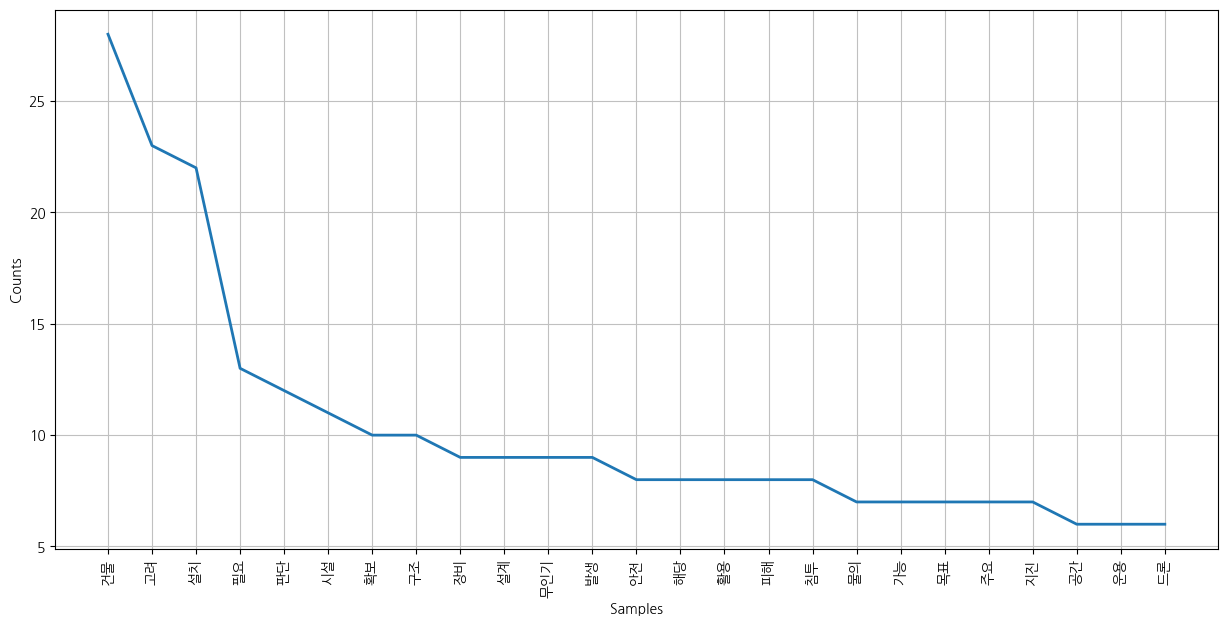

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
word_counted = nltk.Text(word_cleaned)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(15, 7))
word_counted.plot(25)

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf']

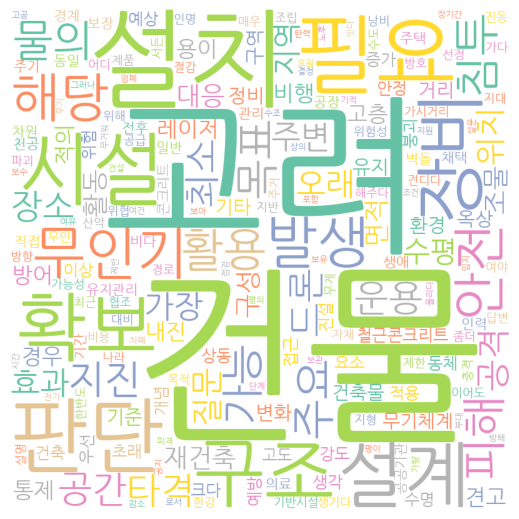

In [ ]:
# mask = np.array(Image.open("/content/sample_data/seoul.jpg"))


word_cloud = WordCloud(
                       font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                       width=800, height=800, # 워드클라우드 크기(해상도)
                       prefer_horizontal= 0.8, # 가로방향 단어 비율 (0~1)
                       background_color='white',
                       colormap = 'Set2',
                    #    mask = mask
                       )

word_cloud.generate_from_frequencies(word_dic)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
